In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing pandas for data analysis and numpy for mathematical solving
import pandas as pd
import numpy as np
#reading the data
data = pd.read_csv('/content/drive/MyDrive/Ridge_Regression_with_5datasets/Mobile_Phone/Mobile phone price (1).csv')

In [3]:
#top 5 
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
#bottom 5
data.tail()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,4500,649


In [5]:
#dimensions
data.shape

(407, 8)

In [6]:
#descriptive statistics for numeric column
data.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [7]:
#count,null values and dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [8]:
#statistics for object column
data.describe(include=['O'])

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Price ($)
count,407,407,407,407,407,407,407
unique,16,239,13,20,41,143,89
top,Samsung,Poco X3 Pro,128GB,4GB,6.5,13MP + 2MP + 2MP,$149
freq,79,6,125,68,108,29,18


In [9]:
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

Brand
Model
Storage 
RAM 
Screen Size (inches)
Camera (MP)
Battery Capacity (mAh)
Price ($)


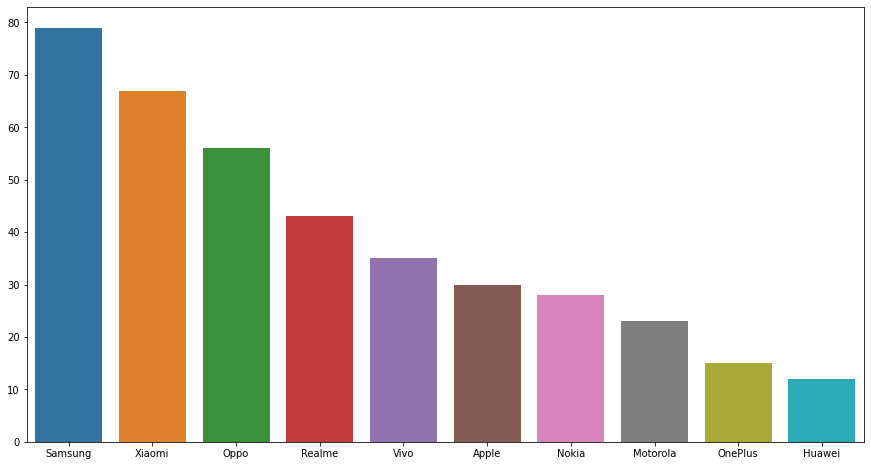

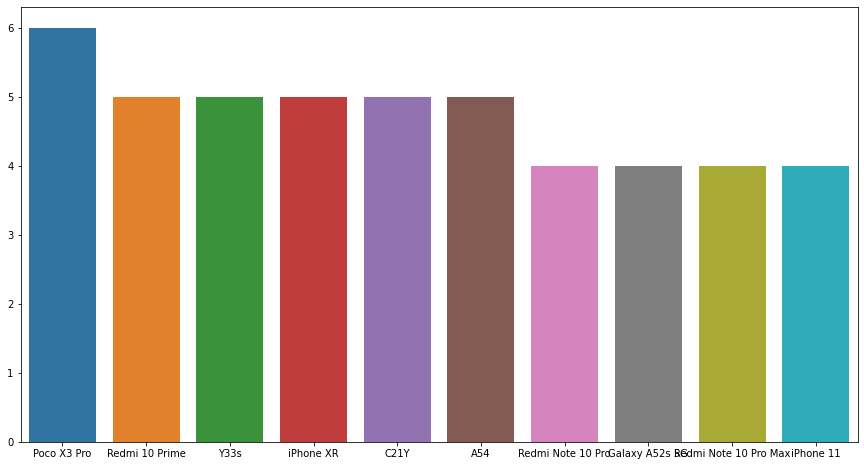

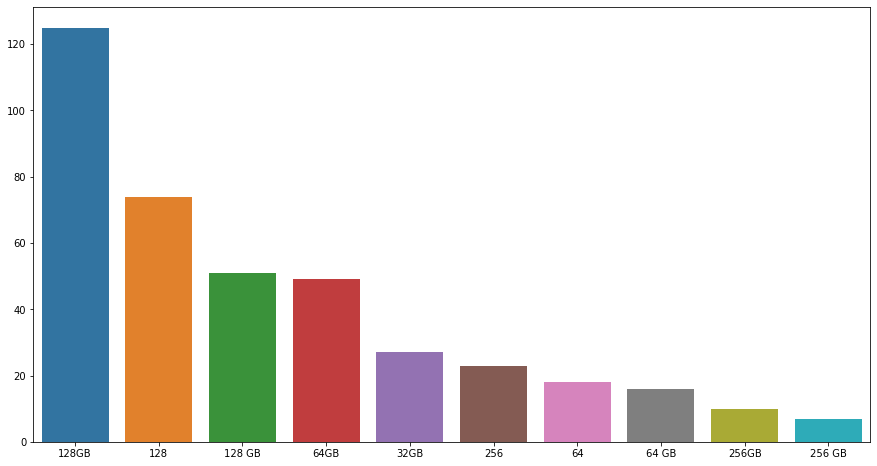

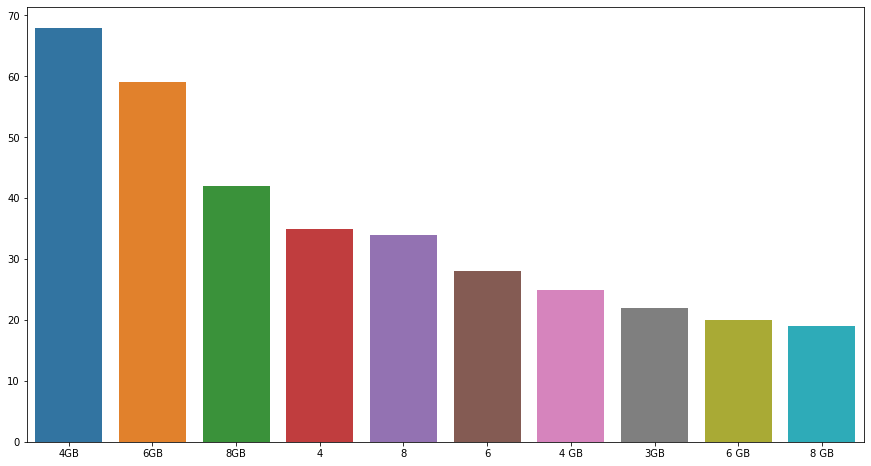

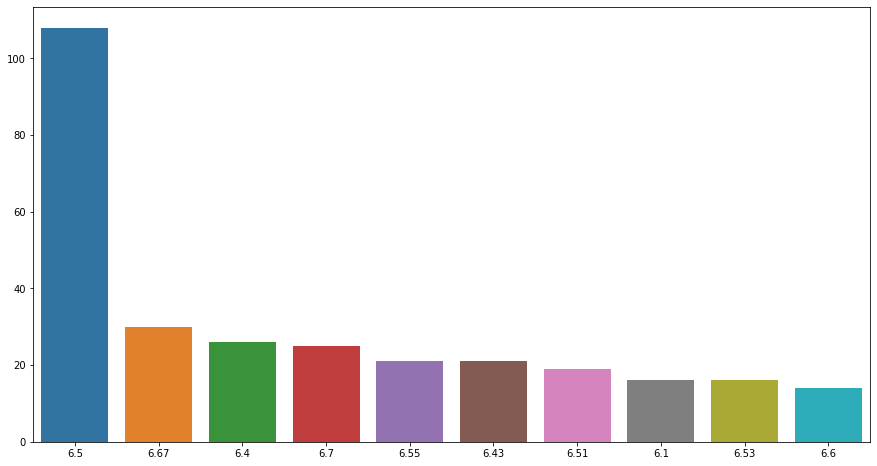

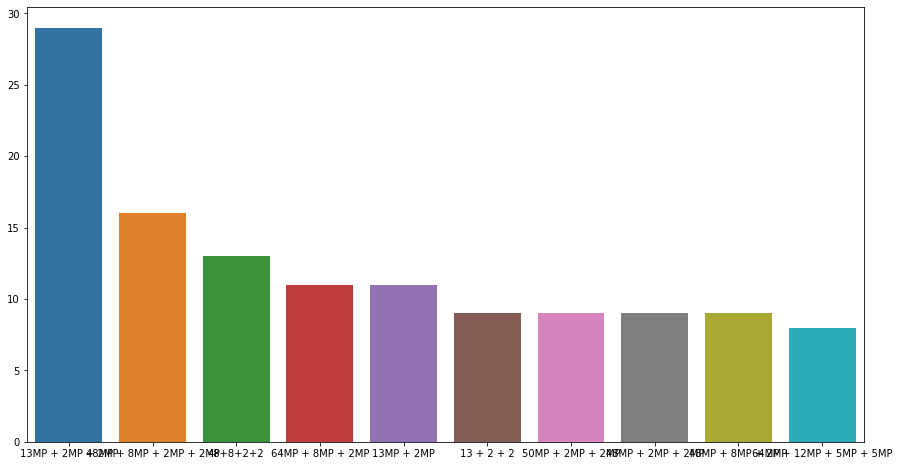

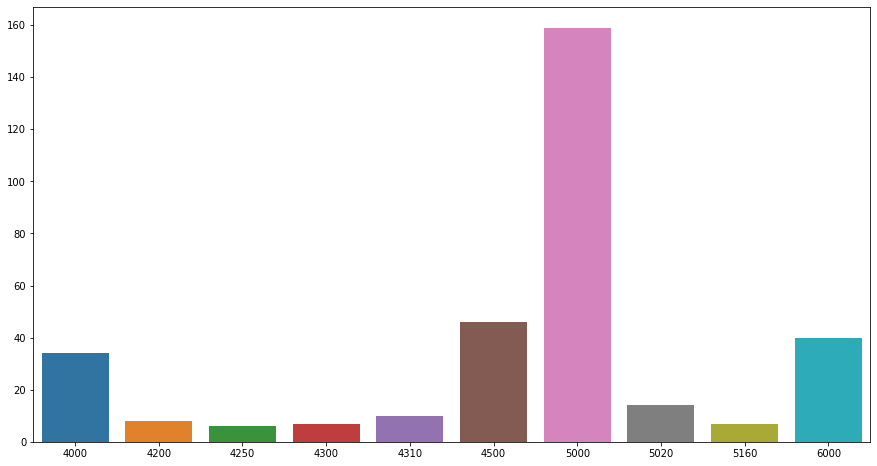

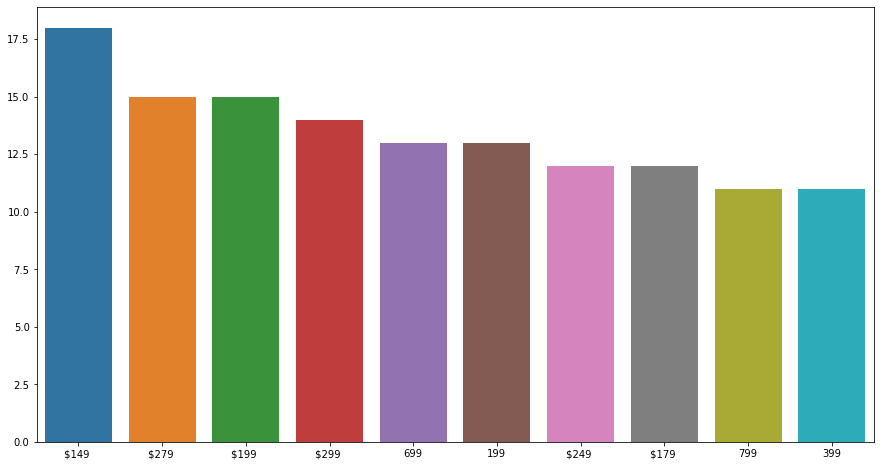

In [10]:
#to count the frequency of each unique variable
from collections import Counter
for i in data:
  point = Counter(data[i].dropna().tolist()).most_common(10)
  name = [name[0] for name in point]
  count = [name[1] for name in point]
  print(i)
  plt.subplots(figsize = (15,8))
  sns.barplot(x = name, y = count)

In [11]:
#to give unique values
print("storag:",data['Storage '].unique())
print("ram:",data['RAM '].unique())
print("price:",data['Price ($)'].unique())
print("Screen Size:",data['Screen Size (inches)'].unique())

storag: ['128 GB' '256 GB' '64 GB' '32 GB' '128GB' '256GB' '64GB' '32GB' '256'
 '64' '128' '512' '32']
ram: ['6 GB' '12 GB' '8 GB' '4 GB' '3 GB' '2 GB' '4GB' '8GB' '6GB' '12GB' '3GB'
 '2GB' '5GB' '12' '3' '6' '8' '4' '16' '2']
price: ['999' '1199' '899' '279' '799' '249' '699' '329' '449' '199' '299' '379'
 '179' '729' '599' '139' '189' '399' '259' '159' '229' '499' '129' '529'
 '369' '1099' '169' '99' '459' '239' '1299' '429' '659' '269' '359'
 '$799 ' '$399 ' '$699 ' '$329 ' '$999 ' '$549 ' '$1,299 ' '$899 ' '$449 '
 '$319 ' '$269 ' '$349 ' '$279 ' '$249 ' '$299 ' '$969 ' '$1,199 ' '$149 '
 '$139 ' '$99 ' '$199 ' '$169 ' '$499 ' '$179 ' '$219 ' '$229 ' '$239 '
 '$109 ' '$189 ' '$389 ' '$309 ' '$369 ' '$129 ' '$849 ' '$469 ' '$209 '
 '$119 ' '$339 ' '$429 ' '$159 ' '$379 ' '$289 ' '130' '749' '149' '969'
 '649' '349' '419' '1399' '1999' '119' '319' '1049']
Screen Size: ['6.1' '6.8' '6.7' '6.67' '6.4' '6.55' '6.78' '6.43' '6.5' '6.62' '5.4'
 '6.2' '6.51' '6.6' '4.7' '6.58' '6.52' '6.44

In [12]:
#replacing
data['Storage '] = data['Storage '].str.replace('GB','')
data['RAM '] = data['RAM '].str.replace('GB','')
data['Price ($)'] = data['Price ($)'].str.replace('$','')
data['Price ($)'] = data['Price ($)'].str.replace(',','')
data.loc[88,'Screen Size (inches)'] = '10.7'
data.loc[373,'Screen Size (inches)'] = '7.6'

<ipython-input-12-086b5e8a2f2f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price ($)'] = data['Price ($)'].str.replace('$','')


In [13]:
data['Price ($)'].unique()

array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '799 ',
       '399 ', '699 ', '329 ', '999 ', '549 ', '1299 ', '899 ', '449 ',
       '319 ', '269 ', '349 ', '279 ', '249 ', '299 ', '969 ', '1199 ',
       '149 ', '139 ', '99 ', '199 ', '169 ', '499 ', '179 ', '219 ',
       '229 ', '239 ', '109 ', '189 ', '389 ', '309 ', '369 ', '129 ',
       '849 ', '469 ', '209 ', '119 ', '339 ', '429 ', '159 ', '379 ',
       '289 ', '130', '749', '149', '969', '649', '349', '419', '1399',
       '1999', '119', '319', '1049'], dtype=object)

In [14]:
split_cols = data['Camera (MP)'].str.split('+',expand=True)
#apply () -->each element or column
#strip()--> removes white spaces in a string.
#strip() method is applied to each element of the DataFrame using a lambda function
split_cols = split_cols.apply(lambda x:x.str.strip())
data[['resolution1','resolution2','resolution3','resolution4']] = split_cols
data = data.drop('Camera (MP)',axis=1)

In [15]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),resolution1,resolution2,resolution3,resolution4
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,12,12,12,None
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,108,10,10,12
2,OnePlus,9 Pro,128,8,6.7,4500,899,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,64,8,5,2
4,Google,Pixel 6,128,8,6.4,4614,799,50,12.2,None,None


In [16]:
print(data['resolution1'].unique())
print(data['resolution2'].unique())
print(data['resolution3'].unique())
print(data['resolution4'].unique())

['12' '108' '48' '64' '50' '13' '12MP' '64MP' '50MP' '48MP' '108MP' '13MP'
 '8MP' '25MP' '12.2' '40' '16']
['12' '10' '50' '8' '12.2' '13' '48' '2' '5' None '12MP' '8MP' '48MP'
 '16MP' '13MP' '5MP' '50MP' '2MP' '16' '20' '7' '40' '64']
['12' '10' '8' '5' None '2' '16' '13' '12MP' '2MP' '13MP' '8MP' '5MP'
 '48MP' '16MP' '10MP' '40']
[None '12' '2' '8' '5' '3' '2MP' '8MP' '5MP' '10MP' '3D' 'ToF' '0.3']


In [17]:
data['resolution1'] = data['resolution1'].str.replace('MP','')
data['resolution2'] = data['resolution2'].str.replace('MP','')
data['resolution3'] = data['resolution3'].str.replace('MP','')
data['resolution4'] = data['resolution4'].str.replace('MP','')
data['resolution4'] = data['resolution4'].str.replace('D','')
data['resolution4'] = data['resolution4'].str.replace('ToF','')

In [18]:
#converting dtype to numeric
data['Storage '] = pd.to_numeric(data['Storage '])
data['RAM '] = pd.to_numeric(data['RAM ']) 

In [19]:
data['Screen Size (inches)'] = pd.to_numeric(data['Screen Size (inches)'])
data['Price ($)'] = pd.to_numeric(data['Price ($)'])
data['resolution1'] = pd.to_numeric(data['resolution1'])
data['resolution2'] = pd.to_numeric(data['resolution2'])
data['resolution3'] = pd.to_numeric(data['resolution3'])
data['resolution4'] = pd.to_numeric(data['resolution4'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   407 non-null    object 
 1   Model                   407 non-null    object 
 2   Storage                 407 non-null    int64  
 3   RAM                     407 non-null    int64  
 4   Screen Size (inches)    407 non-null    float64
 5   Battery Capacity (mAh)  407 non-null    int64  
 6   Price ($)               407 non-null    int64  
 7   resolution1             407 non-null    float64
 8   resolution2             398 non-null    float64
 9   resolution3             325 non-null    float64
 10  resolution4             149 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 35.1+ KB


In [21]:
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'resolution1', 'resolution2',
       'resolution3', 'resolution4'],
      dtype='object')

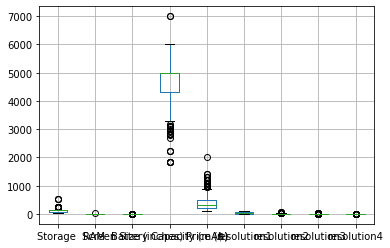

In [22]:
#to find the outliers using boxplot
data.boxplot(column = ['Storage ', 'RAM ', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'resolution1', 'resolution2',
       'resolution3', 'resolution4'])
plt.show()

In [23]:
names= ['Storage ', 'RAM ', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'resolution1', 'resolution2',
       'resolution3', 'resolution4']

In [24]:
#replacing the outliers using 'interquartile capping' 
def iqr_capping(data,col):
  for i in col:

    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    iqr = q3-q1

    upper_whisker = q3 + (1.5*iqr)
    lower_whisker = q1 - (1.5*iqr)

    data[i] = np.where(data[i] > upper_whisker,upper_whisker,np.where(data[i] < lower_whisker,lower_whisker,data[i]))

In [25]:
iqr_capping(data,names)

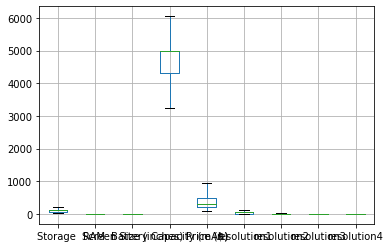

In [26]:
data.boxplot(column = ['Storage ', 'RAM ', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'resolution1', 'resolution2',
       'resolution3', 'resolution4'])
plt.show()

In [27]:
#object to numerical
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
  if data[i].dtype == 'object':
    label_encoder = LabelEncoder()
    data[i] = label_encoder.fit_transform(data[i])

In [28]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),resolution1,resolution2,resolution3,resolution4
0,0,232,128.0,6.0,6.215,3250.0,949.0,12.0,12.0,9.5,NaN
1,12,100,224.0,12.0,6.800,5000.0,949.0,108.0,10.0,9.5,2.0
2,9,19,128.0,8.0,6.700,4500.0,899.0,48.0,27.0,8.0,2.0
3,15,178,128.0,6.0,6.670,5020.0,279.0,64.0,8.0,5.0,2.0
4,4,162,128.0,8.0,6.400,4614.0,799.0,50.0,12.2,NaN,NaN


In [29]:
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'resolution1', 'resolution2',
       'resolution3', 'resolution4'],
      dtype='object')

In [30]:
#checking null values. since after splitting the camera there will be null values as some have only 2 resolutions
data.isnull().sum()

Brand                       0
Model                       0
Storage                     0
RAM                         0
Screen Size (inches)        0
Battery Capacity (mAh)      0
Price ($)                   0
resolution1                 0
resolution2                 9
resolution3                82
resolution4               258
dtype: int64

In [31]:
data = data.fillna(0)

In [32]:
data.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Battery Capacity (mAh)    0
Price ($)                 0
resolution1               0
resolution2               0
resolution3               0
resolution4               0
dtype: int64

In [33]:
data['Price ($)'].head()

0    949.0
1    949.0
2    899.0
3    279.0
4    799.0
Name: Price ($), dtype: float64

In [34]:
#to check the skewness of the data
from scipy.stats import skew
for i in data:
  print(skew(data[i],axis=0))

-1.0324374840757744
0.03899320091900077
0.4022369489510793
0.8953358618646556
-0.18668258835736556
-0.1922235864911604
1.0628937563696688
0.39445090698918395
1.385633094325633
1.08390405714458
0.5559343522449707


In [35]:
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'resolution1', 'resolution2',
       'resolution3', 'resolution4'],
      dtype='object')

In [36]:
#dealing with skewness with 'log' or 'sqrt' 
#since log transforamtion does not work with values 0 and -ve 
data['RAM '] = np.log(data['RAM '])
data['Price ($)'] = np.log(data['Price ($)'])
data['resolution2'] = np.sqrt(data['resolution2'])
data['resolution3'] = np.sqrt(data['resolution3'])

In [37]:
for i in data:
  print(skew(data[i],axis=0))

-1.0324374840757744
0.03899320091900077
0.4022369489510793
-0.04699857800776313
-0.18668258835736556
-0.1922235864911604
0.28640151640285766
0.39445090698918395
0.1264199346335729
-0.10774486309767858
0.5559343522449707


In [38]:
data['Price ($)'].head()

0    6.855409
1    6.855409
2    6.801283
3    5.631212
4    6.683361
Name: Price ($), dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X = data.drop(['Price ($)'],axis=1)
y = data['Price ($)']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)

(325, 10)
(82, 10)


In [40]:
X_train.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),resolution1,resolution2,resolution3,resolution4
351,12,102,224.0,2.079442,6.700,4800.0,12.0,5.196152,3.082207,0.0
307,8,61,128.0,1.386294,6.815,4850.0,48.0,2.236068,1.414214,0.0
48,12,86,64.0,1.386294,6.500,6000.0,48.0,2.236068,1.414214,2.0
403,15,111,128.0,1.791759,6.570,4160.0,48.0,2.828427,1.414214,2.0
42,12,82,64.0,1.386294,6.400,6000.0,48.0,2.828427,1.414214,2.0


In [41]:
X_test.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),resolution1,resolution2,resolution3,resolution4
284,14,209,64.0,1.386294,6.35,5000.0,13.0,2.828427,1.414214,0.0
71,12,72,128.0,1.386294,6.60,5000.0,48.0,2.236068,1.414214,0.0
49,10,25,64.0,1.386294,6.52,5000.0,13.0,1.414214,1.414214,0.0
335,10,189,224.0,2.484907,6.55,4000.0,48.0,3.464102,3.082207,0.0
43,10,54,128.0,2.079442,6.43,4310.0,64.0,2.828427,1.414214,2.0


In [42]:
y_train.head()

351    6.855409
307    5.700444
48     5.068904
403    5.855072
42     5.241747
Name: Price ($), dtype: float64

In [43]:
X_train = X_train.fillna(0)

In [44]:
X_train.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Battery Capacity (mAh)    0
resolution1               0
resolution2               0
resolution3               0
resolution4               0
dtype: int64

In [45]:
X_test = X_test.fillna(0)

In [46]:
X_test.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Battery Capacity (mAh)    0
resolution1               0
resolution2               0
resolution3               0
resolution4               0
dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
data = standardizer.fit(data).transform(data)

In [48]:
import time
start_time = time.time()

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

r1 = Ridge(alpha=1)
r1.fit(X_train,y_train)
pred_train_r1 = r1.predict(X_train)
print('train R^2:',r2_score(y_train,pred_train_r1))
print('train Mean Squared Error:',mean_squared_error(y_train,pred_train_r1))
print('train Mean Absolute Error:',mean_absolute_error(y_train,pred_train_r1))
print('-----------------------------------------')
pred_test_r1 = r1.predict(X_test)
print('test R^2:',r2_score(y_test,pred_test_r1))
print('test Mean Squared Error:',mean_squared_error(y_test,pred_test_r1))
print('test Mean Absolute Error:',mean_absolute_error(y_test,pred_test_r1))
print('-----------------------------------------')

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train R^2: 0.8780272274310555
train Mean Squared Error: 0.04630714271618475
train Mean Absolute Error: 0.1698585034294746
-----------------------------------------
test R^2: 0.8951697264347072
test Mean Squared Error: 0.038271493068942564
test Mean Absolute Error: 0.14978435669680862
-----------------------------------------
Time taken : 0.17917418479919434


In [49]:
r1.coef_

array([-4.40866309e-02,  9.42176192e-04,  2.58463575e-03,  4.38165835e-01,
        2.71274134e-01, -2.20427482e-04,  4.03096780e-04,  1.56529568e-01,
        8.73775295e-02, -3.81566827e-02])

In [50]:
start_time = time.time()

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.00001,0.001,0.01,0.1,1,10,100]}
tuning = GridSearchCV(r1, param_grid,cv=10)
tuning.fit(X_train,y_train)
print(tuning.best_params_)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

{'alpha': 0.1}
Time taken : 1.4118421077728271


In [51]:
r1 = Ridge(alpha=tuning.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=0.1)

In [52]:
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {'alpha': uniform(0,10)}
random = RandomizedSearchCV(r1, param_distributions = param_dist,n_iter=100,cv=5)
random.fit(X_train,y_train)
print('best hyperparameters:',random.best_params_)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

best hyperparameters: {'alpha': 0.0037440898650831222}
Time taken : 5.5535666942596436


In [53]:
r1 = Ridge(alpha=random.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=0.0037440898650831222)

In [54]:
start_time = time.time()

from sklearn.ensemble import AdaBoostRegressor
r1 = Ridge(alpha=random.best_params_['alpha'])
ada = AdaBoostRegressor(estimator=r1,n_estimators=50,learning_rate=0.001)
ada.fit(X_train,y_train)
train_score = ada.score(X_train,y_train)
test_score = ada.score(X_test,y_test)
print('train r2:',train_score)
print('test r2:',test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train r2: 0.8783799495259074
test r2: 0.8921544991984544
Time taken : 0.286912202835083


In [57]:
start_time = time.time()

from xgboost import XGBRegressor
r1 = Ridge(alpha=random.best_params_['alpha'])
boosting = XGBRegressor()
boosting.fit(X_train,y_train)
price_pred_train = boosting.predict(X_train)

price_pred_test = boosting.predict(X_test)
print('train R^2:',r2_score(y_train,price_pred_train))
print('train Mean Squared Error:',mean_squared_error(y_train,price_pred_train))
print('train Mean Absolute Error:',mean_absolute_error(y_train,price_pred_train))
print('-------------------------------------')
print('test R^2:',r2_score(y_test,price_pred_test))
print('test Mean Squared Error:',mean_squared_error(y_test,price_pred_test))
print('test Mean Absolute Error:',mean_absolute_error(y_test,price_pred_test))

end_time = time.time()
execution_time = end_time - start_time
print('-------------------------------------')
print("Time taken :", execution_time)

train R^2: 0.9970199616921628
train Mean Squared Error: 0.0011313759318106488
train Mean Absolute Error: 0.01526169277985245
-------------------------------------
test R^2: 0.9519276810538375
test Mean Squared Error: 0.01755026824584358
test Mean Absolute Error: 0.08967779054351822
-------------------------------------
Time taken : 0.3606760501861572


In [58]:
#price_pred_train = price_pred_train.astype(int)
print('prediction for train:',price_pred_train)
print('prediction for test:',price_pred_test)

prediction for train: [6.8540177 5.700263  5.0734653 5.8520126 5.241386  5.4771423 5.711589
 5.293036  6.85557   5.627367  5.5238686 5.6989694 6.1932244 5.8536477
 5.627367  4.938056  5.5639434 5.2924476 4.9710274 6.8560696 6.800228
 6.037222  5.6351733 5.694177  5.6996727 5.496513  5.519605  6.1064634
 5.514521  6.8034196 6.854266  5.8013406 4.643026  5.010365  6.8547893
 5.787919  5.6304426 4.933981  5.85746   5.848502  5.293036  5.769266
 5.978671  6.1086664 6.614854  4.9644165 5.7481003 6.399989  6.6842437
 6.8549733 5.6996727 6.55014   5.473609  5.908987  6.1086664 5.4875836
 5.8013983 5.5230284 5.8260536 6.8554916 6.064529  5.473609  6.2110834
 5.8013983 6.3890405 4.5931487 6.5543876 5.256387  6.8563504 4.5945783
 6.1210465 5.3008385 5.431882  5.09653   5.09653   5.666502  6.215973
 4.937181  6.6808715 6.8526435 6.8548875 6.854138  6.855733  6.5519123
 6.104842  5.501847  4.935225  5.3639045 5.6274114 5.603027  5.198081
 4.643026  5.6416917 6.7994    5.988242  4.999277  5.5844474